In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_excel('C:\\Users\\Raushan Kumar\\Downloads\\Code\\co2_concentrations\\Monthly_CO2_Concentrations.xlsx', converters={'Year': np.int32, 'Month':np.int32})
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


In [26]:
data = data[(~pd.isnull(data['CO2'])) & (~pd.isnull(data['Year'])) & (~pd.isnull(data['Month']))]

In [29]:
data.sort_values(['Year','Month'],axis = 0,inplace=True)

In [36]:
data.sort_values(['Year','Month'],ascending=True,inplace = True)

In [37]:
data

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9
...,...,...,...
169,351.71,1987,5
170,350.94,1987,6
171,349.10,1987,7
172,346.77,1987,8


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 173
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     161 non-null    float64
 1   Year    161 non-null    object 
 2   Month   161 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.0+ KB


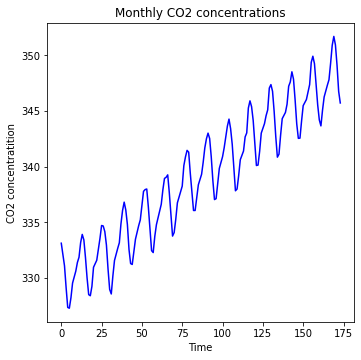

In [56]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(data['CO2'],color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
#plt.xticks(rotation=30)
plt.show()

(array([ 70.,  75.,  80.,  85.,  90.,  95., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

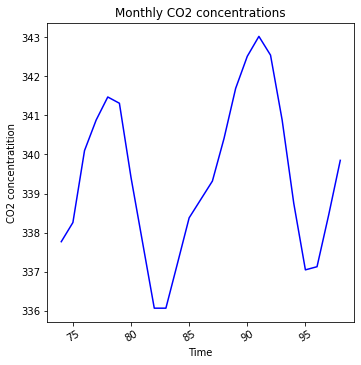

In [57]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

In [59]:
np.array(data.index).reshape((-1,1))

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
       [ 74],
       [ 75],
       [ 76],
      

In [61]:
data['CO2']

0      333.13
1      332.09
2      331.10
3      329.14
4      327.36
        ...  
169    351.71
170    350.94
171    349.10
172    346.77
173    345.73
Name: CO2, Length: 161, dtype: float64

In [62]:
from sklearn.linear_model import LinearRegression
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.array(data.index).reshape((-1,1)), data['CO2'].values)
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],trend_model.intercept_))

Trend model coefficient=0.11182207854546031 and intercept=329.4554222337025


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

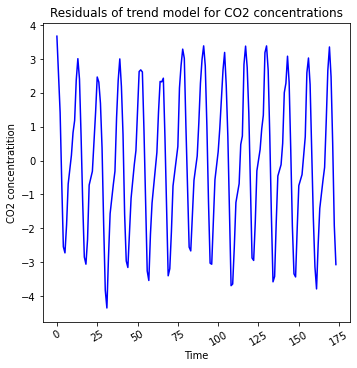

In [63]:
residuals = np.array(data['CO2']) - trend_model.predict(np.array(data.index).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

In [64]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
    4: 'Q2', 5: 'Q2', 6: 'Q2',
    7: 'Q3', 8: 'Q3', 9: 'Q3',
    10: 'Q4', 11: 'Q4', 12: 'Q4'
    }
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

In [72]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])#.reset_index()

In [74]:
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '(1985, Q2)'),
  Text(0.0, 0, '(1974, Q2)'),
  Text(10.0, 0, '(1976, Q4)'),
  Text(20.0, 0, '(1979, Q2)'),
  Text(30.0, 0, '(1981, Q4)'),
  Text(40.0, 0, '(1984, Q2)'),
  Text(50.0, 0, '(1986, Q4)'),
  Text(60.0, 0, '')])

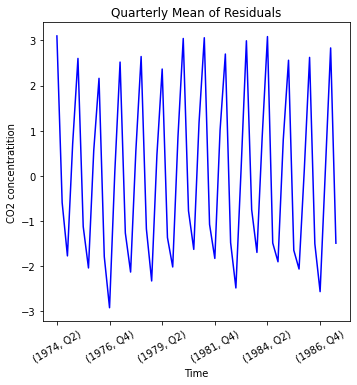

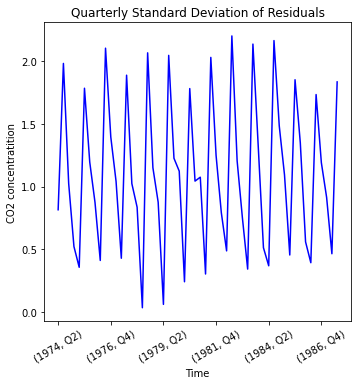

In [75]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
#plot quarterly standard deviation of residuals
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

In [ ]:
#ACF is used to determine MA part
#PACF is used to determine AR part
#line crossing dooted line(thresold value) will be consider for calculation (significance)